<a href="https://colab.research.google.com/github/brendenwest/ad450/blob/master/4_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization

### Reading

- McKinney, Chapter 9
- https://blog.growingdata.com.au/a-guided-introduction-to-exploratory-data-analysis-eda-using-python/
- https://www.datasciencecourse.org/notes/visualization/
- https://seaborn.pydata.org/introduction.html

### Watch 
- [Bullshit data graphics](https://callingbullshit.org/videos.html) 1.2 & chapter 6

### Practice
- https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python
- https://www.datacamp.com/courses/introduction-to-seaborn
- https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial
- https://www.datacamp.com/community/tutorials/geospatial-data-python

### Learning Outcomes

- exploratory data analysis
- common data plots - line, bar, scatter, histogram
- Plotting data with matplotlib
- Plotting data with pandas
- Statistical graphics with seaborn
- Interactive data visualization for web browsers
- Data visualization with Tableau & D3
- visualization practices to avoid


### What is Data Visualization

- visualization for **data exploration** to see data structure & patterns for later analysis
- visualization for **presentation** of conclusions
- learning how to visualize data before applying more sophisticated methods is a key skill for effective data science

#### Python visualization tools:

- pandas - has some built-in charting features for pandas Series & Dataframes
- matplotlib - go-to python library for data charts
- seaborn - python library optimized for simplified production of statistical charts
- Bokeh & Plotly - Python libraries for interactive web graphics
- [Geoplot](http://geopandas.org/gallery/plotting_with_geoplot.html) - Python library for easy-to-use geospatial visualizations, designed to work with GeoPandas input.
- [ScatterText](https://github.com/JasonKessler/scattertext#overview) - Python tool for visualizing what words and phrases are more characteristic of a category than others.


#### Other Visualization Tools

- [D3.js](https://d3js.org/) - JavaScript library for interactive web graphics
- [Tableau](https://www.tableau.com/) - drag-and-drop data analytics tools
- [PowerBI](https://powerbi.microsoft.com/en-us/what-is-power-bi/) - Microsoft data analytics solution. Similar to Tableau.


### Exploratory Data Analysis (EDA)

EDA is a crucial initial step for understanding a dataset and preparing for statistical modeling.

Answers questions such as:
- what is the data quality?
- is the data predictive enough for modeling?

EDA is the process of performing initial investigations to:
- Uncover underlying structure & patterns in the data
- Identify important variables
- Identify anomalies
- Test a hypothesis
- Check assumptions
- Set the stage for model development


#### Step 1 - Understanding the data

- how many observations?
- how many features (variables)?
- which are the dependent variables?
- what are the data types?
- are variables numeric or categorical?
- what are the primary statistics for each feature?

Types of data

- Nominal - categorical data with no inherent ordering between the categories (e.g. vehicle types)
- Ordinal - categorical data with an inherent ordering, but where the “differences” between categories has no numerical meaning (e.g. agree, strongly agree, etc)
- Interval - numeric data with ordering, where relative differences in interval data have meaning (e.g. temperatures)
- Ratio - numeric data where the ratio between measurements has some meaning



In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("sample_data/Road_Crashes_for_five_Years_Victoria.csv")

In [ ]:
# inspect the data
data.head()

,X,Y,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,LIGHT_CONDITION,POLICE_ATTEND,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,RUN_OFFROAD,NODE_ID,LONGITUDE,LATITUDE,NODE_TYPE,LGA_NAME,REGION_NAME,VICGRID_X,VICGRID_Y,TOTAL_PERSONS,INJ_OR_FATAL,FATALITY,SERIOUSINJURY,OTHERINJURY,NONINJURED,MALES,FEMALES,BICYCLIST,PASSENGER,DRIVER,PEDESTRIAN,PILLION,MOTORIST,UNKNOWN,PED_CYCLIST_5_12,PED_CYCLIST_13_18,OLD_PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,ALCOHOL_RELATED,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
0,2520840.558,2392193.725,1,T20150013821,ABS to receive accident,Finished,2015/07/01 00:00:00+00,1899/12/30 07:00:00+00,No,Collision with vehicle,Wednesday,REAR END(VEHICLES IN SAME LANE),No,Dusk/Dawn,Yes,Not at intersection,Serious injury accident,100 km/hr,No,291566,145.237220,-37.971209,Non-Intersection,CASEY,METROPOLITAN SOUTH EAST REGION,2520840.558,2392193.725,4.0,1.0,0.0,1.0,0.0,3.0,2.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,No,0.0,4.0,0.0,4.0,0.0,0.0,MELB_URBAN,MELB_URBAN,CASEY,METROPOLITAN SOUTH EAST REGION,M,M,Freeway,Freeway,Divided,Divided,Metro
1,2526250.022,2381737.187,2,T20150013832,ABS to receive accident,Finished,2015/07/01 00:00:00+00,1899/12/30 09:55:00+00,No,Collision with vehicle,Wednesday,CROSS TRAFFIC(INTERSECTIONS ONLY),No,Day,Yes,Cross intersection,Serious injury accident,60 km/hr,No,35737,145.298911,-38.065277,Intersection,CASEY,METROPOLITAN SOUTH EAST REGION,2526250.022,2381737.187,2.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,No,0.0,2.0,0.0,1.0,0.0,1.0,MELB_URBAN,MELB_URBAN,CASEY,METROPOLITAN SOUTH EAST REGION,C,C,Arterial Other,"Arterial Other,Local Road",Divided,"Divided,Undivided",Metro
2,2538721.430,2400594.959,3,T20150013882,ABS to receive accident,Finished,2015/07/01 00:00:00+00,1899/12/30 21:50:00+00,Yes,Collision with a fixed object,Wednesday,OFF RIGHT BEND INTO OBJECT/PARKED VEHICLE,No,Dark No street lights,Yes,Not at intersection,Serious injury accident,60 km/hr,Yes,292361,145.441219,-37.894931,Non-Intersection,YARRA RANGES,METROPOLITAN SOUTH EAST REGION,2538721.430,2400594.959,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,1.0,0.0,1.0,0.0,0.0,MELB_URBAN,MELB_URBAN,YARRA RANGES,METROPOLITAN SOUTH EAST REGION,C,C,Arterial Other,Arterial Other,Undivided,Undivided,Metro
3,2516547.808,2389749.139,4,T20150013886,ABS to receive accident,Finished,2015/07/01 00:00:00+00,1899/12/30 06:00:00+00,Yes,Collision with a fixed object,Wednesday,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,No,Dark Street lights on,Yes,T intersection,Serious injury accident,80 km/hr,Yes,282422,145.188348,-37.993356,Intersection,DANDENONG,METROPOLITAN SOUTH EAST REGION,2516547.808,2389749.139,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,1.0,0.0,0.0,1.0,0.0,MELB_URBAN,MELB_URBAN,DANDENONG,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Highway,"Local Road,Arterial Highway",Divided,"Undivided,Divided",Metro
4,2485112.951,2413934.747,5,T20150013922,ABS to receive accident,Finished,2015/07/02 00:00:00+00,1899/12/30 15:50:00+00,No,Collision with vehicle,Thursday,VEHICLE STRIKES ANOTHER VEH WHILE EMERGING FRO...,No,Day,Yes,T intersection,Other injury accident,50 km/hr,No,64208,144.831010,-37.775443,Intersection,BRIMBANK,METROPOLITAN NORTH WEST REGION,2485112.951,2413934.747,2.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,2.0,0.0,2.0,0.0,0.0,MELB_URBAN,MELB_URBAN,BRIMBANK,METROPOLITAN NORTH WEST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro


In [5]:
# extract numeric & categorical data
numeric_features = data[["INJ_OR_FATAL","FATALITY","MALES",
       "FEMALES","DRIVER","PEDESTRIAN",
       "OLD_DRIVER","YOUNG_DRIVER" ,"UNLICENCSED",
       "HEAVYVEHICLE","PASSENGERVEHICLE","MOTORCYCLE"
]]
categorical_features=data[[
       "ACCIDENT_TIME","ACCIDENT_TYPE","DAY_OF_WEEK",
        "DCA_CODE","HIT_RUN_FLAG","LIGHT_CONDITION",
        "ROAD_GEOMETRY","SPEED_ZONE"
]]

In [6]:
# show counts for the alchohol related classes
data["ALCOHOL_RELATED"].value_counts()


No     73064
Yes     2256
Name: ALCOHOL_RELATED, dtype: int64

#### Step 2 - Univariate Analysis

Describe & understand distribution of a single variable. Detect outliers. Identify patterns.

**Numeric features**

Measures of **center** (e.g. mean, median, mode)

Measures of **spread** - how variable is the data (e.g. variance & standard deviation). Histograms are useful to show distribution

**outliers** are values outside common distribution. Very dataset specific. Boxplots are useful for identifying outliers.

In [7]:
numeric_features.describe()

,INJ_OR_FATAL,FATALITY,MALES,FEMALES,DRIVER,PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,UNLICENCSED,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE
count,75320.000000,75320.000000,75320.000000,75320.000000,75320.000000,75320.000000,75320.000000,75320.000000,75320.000000,75312.000000,75312.000000,75312.000000
mean,1.273951,0.022039,1.296867,0.914073,1.437931,0.111352,0.070605,0.285661,0.035170,0.046673,1.406177,0.157877
std,0.753500,0.156444,0.977108,1.044578,0.901794,0.383219,0.262363,0.508034,0.185503,0.223708,0.930047,0.374118
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000
max,48.000000,6.000000,30.000000,51.000000,21.000000,41.000000,3.000000,5.000000,2.000000,4.000000,19.000000,5.000000


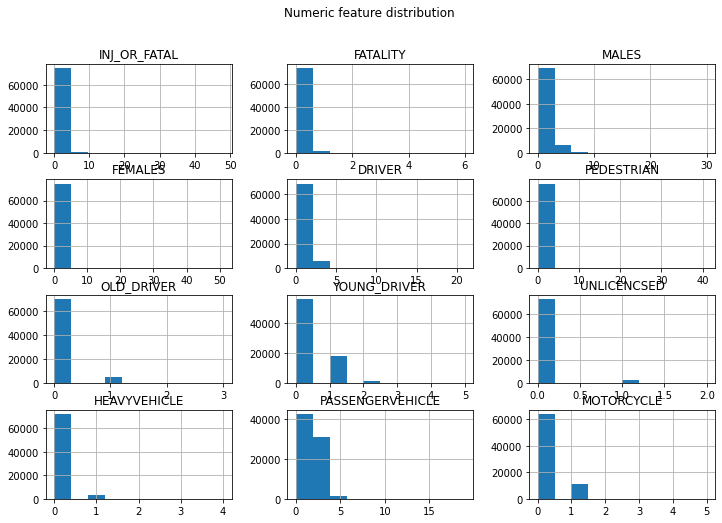

In [15]:
# show distributions visually
numeric_features.hist(figsize=[12,8])
plt.suptitle("Numeric feature distribution")
plt.show()

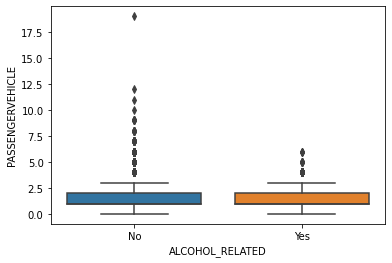

In [19]:
# look for outliers
sns.boxplot(x='ALCOHOL_RELATED',y='PASSENGERVEHICLE',data=data)
plt.show()



**Probability Density Function** (PDF) - a function whose value at any given sample is the relative likelihood that the value of a random variable would equal that sample. For continuous variables.

When plotted, the x-axis represents the value ranges while the y-axis represents the percentage of data points for each target value.

**Cumulative Distribution Function (CDF)** - probability that a continuous random variable has a value <= to a given value. 

https://towardsdatascience.com/probability-concepts-explained-probability-distributions-introduction-part-3-4a5db81858dc

**Categorical**

Analysis usually involves tabulating range & frequency of values (counts & percents). Percentages should sum to 100%

In [20]:
counts = categorical_features["ACCIDENT_TYPE"].value_counts()
percent100 = categorical_features["ACCIDENT_TYPE"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
light_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
light_conditions

,counts,Percent
Collision with vehicle,46189,61.3%
Collision with a fixed object,11905,15.8%
Struck Pedestrian,7227,9.6%
Vehicle overturned (no collision),3926,5.2%
No collision and no object struck,3368,4.5%
collision with some other object,1070,1.4%
Fall from or in moving vehicle,766,1.0%
Struck animal,760,1.0%
Other accident,109,0.1%


#### Step 3 - Bi-Variate Analysis

Analysis that explores the relationship between two variables.

**Numeric**

**scatterplot** visualizes relationship between two numberic variables. Helps to identify potential relationship (type & strength)

**Correlation matrix**

Square matrix with same variables in rows & columns. level of correlation is shown with values ranging from 0 (no correlation) to 1 (highly correlated). **heatmap** plot can show correlation intensity with color density.

**Categorical**

Can be visualized in a correlation matrix, after encoding textual values into numeric ones (**label encoding**).

**Stacked column chart** can show the percentages that each category from one variable contributes to a total across categories of the second variable.


#### Step 4 - Multivariate Analysis

Generally shows the statistical relationship between two or more variables.

**Contour plot** can show combinations with highest probability.

**Principal Component Analysis (PCA)** - 

A set of observations of correlated variables are converted into a set of values of linearly uncorrelated variables.

Can completely restructure the data, removing redundancies and ordering newly obtained components according to the amount of the original variance that they express.

Can give great insights about how the set of features collectively collaborate to describe the analysis outcome (target).

Very common technique for speeding up a machine learning algorithm by reducing the dimensionality of input features.


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

### matplotlib

matplotlib is python plotting package designed for creating (mostly two-dimensional) publication-quality plots. 

It allows interactive plotting from the iPython shell or within Jupyter notebooks

matplotlib can export visualizations to  common vector and raster graphics formats (PDF, SVG, JPG, PNG, BMP, GIF, etc.). 

- plots & plot types
- title & labels
- legends
- subplots
- annotations
- saving plots

### Plotting with pandas

- Series plot
- DataFrame plot
- plot features

### Seaborn plots

Seaborn is a Python data visualization library based on matplotlib. 

It's designed to simplify data exploration and production of informative statistical graphics.

Seaborn's dataset-oriented plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots.

**concepts**
- confidence intervals
- crosstabs
- distributions
- continuous probability distribution
- linear regression
- box plots
- violin plots
- heat maps